# Data Wrangling in Python
    1. Importing a file and adding headers
    2. Steps for working with missing data
    3. Types of normalization
    4. Binning
    5. Create dummy values
    6. Create a histogram

In [75]:
# Import the packages we will need
import pandas as pd
import matplotlib as plt
import numpy as np

### Importing a file and adding headers

In [76]:
# Set path and name of file
filename=".\data\\auto.csv"
# Set headers for the file
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
# Use pandas to import the file with the defined headers
df = pd.read_csv(filename, names = headers)
#df.head()

## Steps for working with missing data:

    1. dentify missing data
    2. Deal with missing data
    3. Correct data format

In [77]:
# Replace "?" with "NaN"
df.replace("?", np.nan, inplace = True)

In [78]:
# Identify missing data with .isnull() and .notnull()
missing_data = df.isnull()

In [79]:
# Count the number of missing values in each column.  True => missing
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

In [80]:
# How to replace missing values with the mean
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [81]:
# Find the most commonly occuring value in a column, and replace missing values with that
df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [82]:
# Drop all rows that don't have the target value, in this case price
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [83]:
# Correct data types of columns
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [84]:
# Values of data can be converted to other units like in this example, and then renamed
df['city-L/100km'] = 235/df["city-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

## Types of normalization
1. Simple feature scaling just divides each value by the maximum value
2. Min-max: subtract min value for each value, divide by the max value minus min value
3. Z-score method uses mean and standard deviation

In [85]:
df['height'].head(10)

0    48.8
1    48.8
2    52.4
3    54.3
4    54.3
5    53.1
6    55.7
7    55.7
8    55.9
9    54.3
Name: height, dtype: float64

In [92]:
print("min",df['height'].min(),"max",df['height'].max())
# Simple scaling
SimpScale = df['height']/df['height'].max()
print("Simple Feature Scaling","\n",SimpScale.head(),sep='')
# Min-Max scaling
MinMax = (df['height'] - df['height'].min())/(df['height'].max() - df['height'].min())
print("Min-Max Scaling","\n",MinMax.head(),sep='')
# Z-score 
ZScore = (df['height']  - df['height'].mean())/df['height'].std()
print("Z-Score Scaling","\n",ZScore.head(),sep='')


min 47.8 max 59.8
Simple Feature Scaling
0    0.816054
1    0.816054
2    0.876254
3    0.908027
4    0.908027
Name: height, dtype: float64
Min-Max Scaling
0    0.083333
1    0.083333
2    0.383333
3    0.541667
4    0.541667
Name: height, dtype: float64
Z-Score Scaling
0   -2.029015
1   -2.029015
2   -0.558319
3    0.217881
4    0.217881
Name: height, dtype: float64


## Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In [15]:
# convert to int first
df["horsepower"]=df["horsepower"].astype(int, copy=True)
# use numpy linspace to create an array of bin values.  The bin values are separated by the same amount
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
# set the names of each bin
group_names = ['Low', 'Medium', 'High']
# use cut to determine what bin each value belongs in and add to a data frame
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
# to see the number of rows in each bin
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

## Create a histogram of horse power bins

Text(0.5, 1.0, 'horsepower bins')

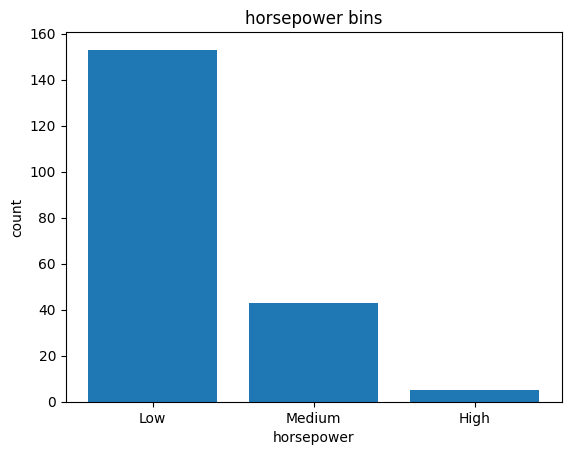

In [20]:
from matplotlib import pyplot as plt
# Choose bar style
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## Indicator Variable (or Dummy Variable)
Set a dummy variable based on a text value of a column

In [ ]:
# Create dummy variables for fuel type
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
# rename columns to a better name
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
# merge dummy variables back into main data frame
df = pd.concat([df, dummy_variable_1], axis=1)
# then drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)